In [1]:
name = 'India'
n = 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.optimize as sco

countries_currency_codes = {
    'Bahrain': 'BHD',            # Bahraini Dinar
    'Egypt': 'EGP',              # Egyptian Pound
    'Israel': 'ILS',             # Israeli New Shekel
    'Nigeria': 'NGN',            # Nigerian Naira
    'Qatar': 'QAR',              # Qatari Riyal
    'Saudi Arabia': 'SAR',       # Saudi Riyal
    'Saudi Arabia DSSA': 'SAR',  # Saudi Riyal (same as Saudi Arabia)
    'South Africa': 'ZAR',       # South African Rand
    'Turkey': 'TRY',             # Turkish Lira
    'United Arab Emirates': 'AED',# UAE Dirham
    
    'Brazil': 'BRL',             # Brazilian Real
    'Canada': 'CAD',             # Canadian Dollar
    'Mexico': 'MXN',             # Mexican Peso
    'USA': 'USD',                # US Dollar
    
    'Australia': 'AUD',          # Australian Dollar
    'China': 'CNY',              # Chinese Yuan Renminbi
    'Hong Kong SAR': 'HKD',      # Hong Kong Dollar
    'Indonesia': 'IDR',          # Indonesian Rupiah
    'Japan': 'JPY',              # Japanese Yen
    'Malaysia': 'MYR',           # Malaysian Ringgit
    'Philippines': 'PHP',        # Philippine Peso
    'Singapore': 'SGD',          # Singapore Dollar
    'South Korea': 'KRW',        # South Korean Won
    'Taiwan': 'TWD',             # Taiwan Dollar
    'Thailand': 'THB',           # Thai Baht
    'Vietnam': 'VND',            # Vietnamese Dong
    
    'Bangladesh': 'BDT',         # Bangladeshi Taka
    'India': 'INR',              # Indian Rupee
    'Kazakhstan': 'KZT',         # Kazakhstani Tenge
    'Pakistan': 'PKR',           # Pakistani Rupee
    'Sri Lanka': 'LKR',          # Sri Lankan Rupee
    'Turkmenistan': 'TMT',       # Turkmenistani Manat

    # New additions:
    'Austria': 'EUR',            # Euro
    'Belgium': 'EUR',            # Euro
    'Czech Republic': 'CZK',     # Czech Koruna
    'France': 'EUR',             # Euro
    'Germany': 'EUR',            # Euro
    'Greece': 'EUR',             # Euro
    'Hungary': 'HUF',            # Hungarian Forint
    'Ireland': 'EUR',            # Euro
    'Italy': 'EUR',              # Euro
    'Jersey': 'GBP',             # British Pound
    'Luxembourg': 'EUR',         # Euro
    'Netherlands': 'EUR',        # Euro
    'Poland': 'PLN',             # Polish Zloty
    'Portugal': 'EUR',           # Euro
    # 'Russia': 'RUB',             # Russian Ruble
    'Serbia': 'RSD',             # Serbian Dinar
    'Spain': 'EUR',              # Euro
    'Sweden': 'SEK',             # Swedish Krona
    'Switzerland': 'CHF',        # Swiss Franc
    'Ukraine': 'UAH',            # Ukrainian Hryvnia
    'United Kingdom': 'GBP'      # British Pound
}


In [3]:
currency_data  = {}
self = countries_currency_codes[name]
for curr in countries_currency_codes.values():
    t2 = 'USD'+curr+'=X'
    if t2 == 'USDUSD=X':
        currency_data[curr] = pd.Series(range(1))
    else:
        currency_data[curr] = yf.download(t2, start='2020-10-20', end='2024-10-15', period='1d')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [14]:
t1 = 'USD' + self + '=X'
data1 = yf.download(t1, start='2010-10-20', end='2022-10-20', period='1d')['Close']

correlation_dict = {}

for curr in countries_currency_codes.values():
    correlation = data1.corr(currency_data[curr])
    correlation_dict[curr] = correlation
    # if correlation < min_cor:
    #     min_cor = correlation
    #     best_cur = curr

least_correlated = sorted(correlation_dict, key=correlation_dict.get)[:n]

best_countries = []
for currency in least_correlated:
    for key, value in countries_currency_codes.items():
        if currency == value:
            best_countries.append(key)
            break

print([correlation_dict[i] for i in least_correlated])
print("5 currencies with the least correlation:", least_correlated)
print("5 countries for hedging:", best_countries)

[*********************100%%**********************]  1 of 1 completed

[-0.28480756218963665, -0.25722403133416805]
5 currencies with the least correlation: ['BRL', 'TMT']
5 countries for hedging: ['Brazil', 'Turkmenistan']


In [5]:
selected_currencies = [currency_data[i] for i in least_correlated]
selected_currencies.insert(0, data1)

currency_values = pd.concat(selected_currencies, axis=1).to_numpy()

In [6]:
import numpy as np
import pandas as pd
import scipy.optimize as sco

# Step 1: Convert currency values to percentage returns
col = ['Currency_'+str(i+1) for i in range(n+1)]
data = pd.DataFrame(currency_values, columns=col)



returns = data.pct_change().dropna()

# Step 3: Estimate expected returns and covariance matrix
expected_returns = returns.mean()  # Daily average returns
cov_matrix = returns.cov()  # Covariance matrix

# Step 4: Portfolio optimization
def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for each weight
bounds = tuple((0, 1) for _ in range(len(expected_returns)))

# Initial guess (equal distribution)
initial_guess = [1 / len(expected_returns)] * len(expected_returns)

# Optimize
optimal = sco.minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = optimal.x
print("Optimal weights for the five stocks:", optimal_weights)

Optimal weights for the five stocks: [0.33333333 0.33333333 0.33333333]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31344\740756461.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [7]:
val = 1000
og = []
for i in range(len(currency_data[self])):
    og.append(val * currency_data[self].iloc[0] / currency_data[self].iloc[i])

better_og = []
for i in range(len(currency_data[self])):
    new = optimal_weights[0] * val * currency_data[self].iloc[0] / currency_data[self].iloc[i]
    for i in range(n):
        new += optimal_weights[i+1] * val * currency_data[least_correlated[i]].iloc[0] / currency_data[least_correlated[i]].iloc[i]
    better_og.append(new)

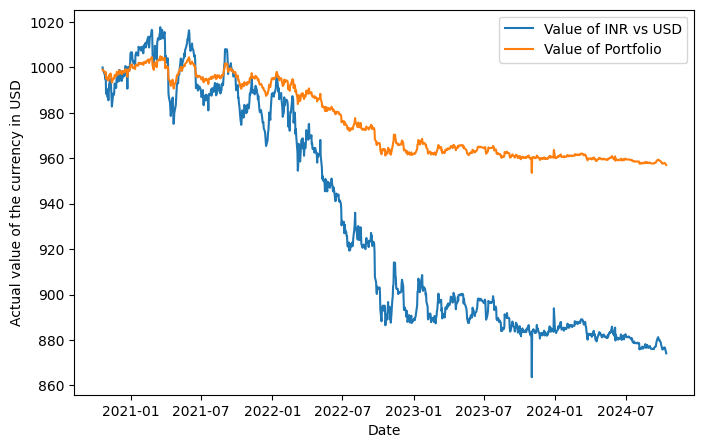

In [8]:
plt.figure(figsize=(8,5))
plt.plot(currency_data[self].index, og, label='Value of '+self+' vs USD')
plt.plot(currency_data[self].index, better_og, label='Value of Portfolio')
plt.xlabel('Date')
plt.ylabel('Actual value of the currency in USD')
plt.savefig('Plot of portfolio vs reference currency')
plt.legend()

In [15]:
best_countries.insert(0, name)
final = pd.DataFrame({
    'currency_code': best_countries,
    'weights': np.around(optimal_weights, 2)*100
})

final.to_csv('Output.csv')